In [3]:
import os
from random import shuffle
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
import numpy as np

In [5]:
def split():
    frame_root = r'C:\Users\ElifKübraÇontar\OneDrive - Surgease Innovations Ltd\Desktop\OGD\Dataset\data_all_frames_540x960'
    all_folders = [f for f in os.listdir(frame_root) if not f.startswith('.')]
    shuffle(all_folders)
    train_set_ratio = 0.7
    val_set_ratio = 0.15
    test_set_ratio = 0.15
    val_set_folder_size = ceil(val_set_ratio * len(all_folders))
    test_set_folder_size = ceil(test_set_ratio * len(all_folders))

    val_folders = all_folders[0:val_set_folder_size]
    test_folders = all_folders[val_set_folder_size:(val_set_folder_size + test_set_folder_size)]
    train_folders = all_folders[(val_set_folder_size + test_set_folder_size):]

    with open(r'C:\Users\ElifKübraÇontar\OneDrive - Surgease Innovations Ltd\Desktop\OGD\Code\splitted_folder_names\train_folders.txt', "w") as f:
        for item in train_folders:f.write("%s\n" % item)

    with open(r'C:\Users\ElifKübraÇontar\OneDrive - Surgease Innovations Ltd\Desktop\OGD\Code\splitted_folder_names\val_folders.txt', "w") as f:
        for item in val_folders:f.write("%s\n" % item)

    with open(r'C:\Users\ElifKübraÇontar\OneDrive - Surgease Innovations Ltd\Desktop\OGD\Code\splitted_folder_names\test_folders.txt', "w") as f:
        for item in test_folders:f.write("%s\n" % item)
    
    print('Length of train set is: ', len(train_folders))
    print('Length of validation set is: ', len(val_folders))
    print('Length of test set is: ', len(test_folders))

    return train_folders, val_folders, test_folders
split()

Length of train set is:  36
Length of validation set is:  9
Length of test set is:  9


(['2016-02-049.mp4',
  '2015-09-066.mp4',
  '2015-11-068.mp4',
  '2016-11-033.mp4',
  '2017-04-012.mp4',
  '2016-10-066.mp4',
  '2016-01-029.mp4',
  '2015-11-055.mp4',
  '2015-08-095.mp4',
  '2015-09-01.mp4',
  '2016-06-023.mp4',
  '015-06-0122.mp4',
  '2016-05-07.mp4',
  '2015-07-079.mp4',
  ' 2015-07-046.mp4',
  '2015-09-080.mp4',
  '2016-06-060.mp4',
  '2016-03-066.mp4',
  '2015-06-089.mp4',
  '2017-01-069.mp4',
  '2015-08-050.mp4',
  '2015-11-09.mp4',
  '2016-10-051.mp4',
  '2015-09-095.mp4',
  '2015-06-0101.mp4',
  '2015-09-084.mp4',
  '2017-03-076.mp4',
  '2015-08-034.mp4',
  '2015-12-62.mp4',
  '2016-08-0117.mp4',
  '2016-09-033.mp4',
  '1_ENDOSCOPY_01 (video-converter.com).mp4',
  '2016-09-0142.mp4',
  '2016-03-047.mp4',
  '2016-08-040.mp4',
  '2015-10-060.mp4'],
 ['2016-01-089.mp4',
  '2015-07-044.mp4',
  '2016-10-060.mp4',
  '2017-05-0102.mp4',
  '2016-02-043.mp4',
  '2016-09-052.mp4',
  '2015-08-0106.mp4',
  '2015-08-016.mp4',
  '2015-11-030.mp4'],
 ['2015-09-0108.mp4',
  '2

In [3]:
def df_train_val_test_split(train_folders, val_folders, test_folders):
    train_df = df.loc[df['video_name'].isin(train_folders)]
    val_df = df.loc[df['video_name'].isin(val_folders)]
    test_df = df.loc[df['video_name'].isin(test_folders)]

    train_vascular = train_df['vascular_pattern_scores']
    train_bleeding = train_df['bleeding_score']
    train_erosions = train_df['erosions_score']
    train_uceis = train_df['UCEIS_score']

    val_vascular = val_df['vascular_pattern_scores']
    val_bleeding = val_df['bleeding_score']
    val_erosions = val_df['erosions_score']
    val_uceis = val_df['UCEIS_score']

    test_vascular = test_df['vascular_pattern_scores']
    test_bleeding = test_df['bleeding_score']
    test_erosions = test_df['erosions_score']
    test_uceis = test_df['UCEIS_score']

    return train_vascular, train_bleeding, train_erosions, val_vascular, val_bleeding, val_erosions, test_vascular, test_bleeding, test_erosions, train_uceis, val_uceis, test_uceis

In [4]:
df = pd.read_csv(r'C:\Users\ElifKübraÇontar\Desktop\gi\label_x50.csv')
df.head()
frame_root = r'C:\Users\ElifKübraÇontar\Desktop\gi\IBD\data_all_frames_540x960'
cord_project_ID = '5c349378-3e58-4028-af97-96ad9d137dd3'
cord_API_key = 'fL_ktLRxfD90iQayw2dLVg-GVkPxQZVq9p6C6cvpvlg'

file = open(r'C:\Users\ElifKübraÇontar\Desktop\gi\Code\splitted_folder_names\test_folders2.txt')
test_folders = file.read().splitlines()
file.close()

file = open(r'C:\Users\ElifKübraÇontar\Desktop\gi\Code\splitted_folder_names\val_folders2.txt')
val_folders = file.read().splitlines()
file.close()

file = open(r'C:\Users\ElifKübraÇontar\Desktop\gi\Code\splitted_folder_names\train_folders2.txt')
train_folders = file.read().splitlines()
file.close()

v1,b1,e1,v2,b2,e2,v3,b3,e3,u1,u2,u3 = df_train_val_test_split(train_folders, val_folders, test_folders)

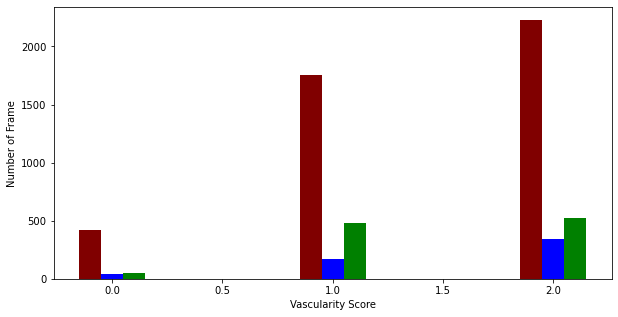

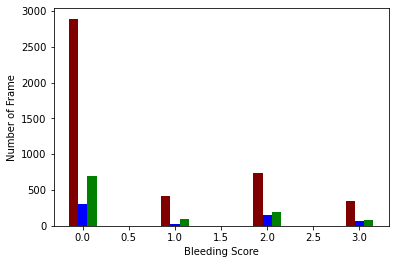

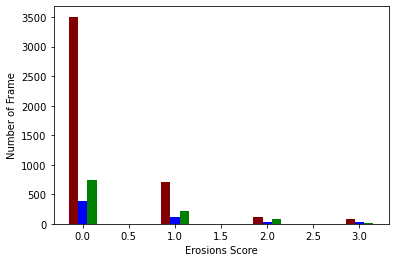

In [5]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar([0-0.1, 1-0.1, 2-0.1],
        [v1.tolist().count(0),v1.tolist().count(1),v1.tolist().count(2)],
        color ='maroon',
        width = 0.1)
plt.bar([0, 1, 2],
        [v2.tolist().count(0),v2.tolist().count(1),v2.tolist().count(2)],
        color ='blue',
        width = 0.1)
plt.bar([0+0.1, 1+0.1, 2+0.1],
        [v3.tolist().count(0),v3.tolist().count(1),v3.tolist().count(2)],
        color ='green',
        width = 0.1)
plt.xlabel("Vascularity Score")
plt.ylabel("Number of Frame")
plt.show()

# creating the bar plot
plt.bar([0-0.1, 1-0.1, 2-0.1, 3-0.1],
        [b1.tolist().count(0),b1.tolist().count(1),b1.tolist().count(2),b1.tolist().count(3)],
        color ='maroon',
        width = 0.1)
plt.bar([0, 1, 2, 3],
        [b2.tolist().count(0),b2.tolist().count(1),b2.tolist().count(2),b2.tolist().count(3)],
        color ='blue',
        width = 0.1)
plt.bar([0+0.1, 1+0.1, 2+0.1, 3+0.1],
        [b3.tolist().count(0),b3.tolist().count(1),b3.tolist().count(2),b3.tolist().count(3)],
        color ='green',
        width = 0.1)
plt.xlabel("Bleeding Score")
plt.ylabel("Number of Frame")
plt.show()

# creating the bar plot
plt.bar([0-0.1, 1-0.1, 2-0.1, 3-0.1],
        [e1.tolist().count(0),e1.tolist().count(1),e1.tolist().count(2),e1.tolist().count(3)],
        color ='maroon',
        width = 0.1)
plt.bar([0, 1, 2, 3],
        [e2.tolist().count(0),e2.tolist().count(1),e2.tolist().count(2),e2.tolist().count(3)],
        color ='blue',
        width = 0.1)
plt.bar([0+0.1, 1+0.1, 2+0.1, 3+0.1],
        [e3.tolist().count(0),e3.tolist().count(1),e3.tolist().count(2),e3.tolist().count(3)],
        color ='green',
        width = 0.1)
plt.xlabel("Erosions Score")
plt.ylabel("Number of Frame")
plt.show()

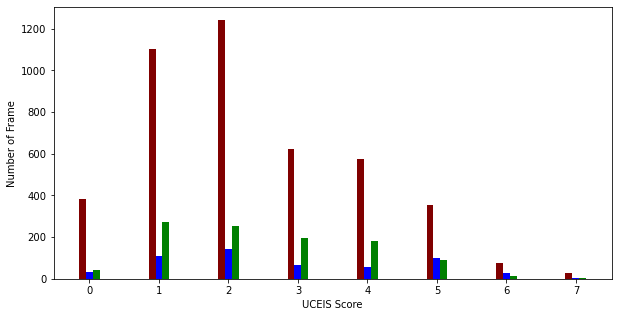

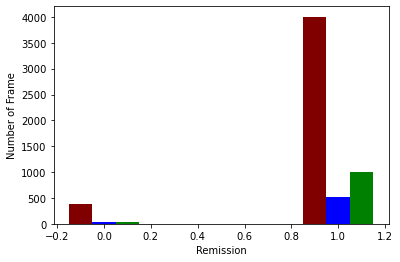

Train:
382
4004
Val:
31
510


In [6]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar([0-0.1, 1-0.1, 2-0.1, 3-0.1, 4-0.1, 5-0.1, 6-0.1, 7-0.1],
        [u1.tolist().count(0),u1.tolist().count(1),u1.tolist().count(2),u1.tolist().count(3),u1.tolist().count(4),u1.tolist().count(5),u1.tolist().count(6),u1.tolist().count(7)],
        color ='maroon',
        width = 0.1)
plt.bar([0, 1, 2, 3, 4, 5, 6, 7],
        [u2.tolist().count(0),u2.tolist().count(1),u2.tolist().count(2),u2.tolist().count(3),u2.tolist().count(4),u2.tolist().count(5),u2.tolist().count(6),u2.tolist().count(7)],
        color ='blue',
        width = 0.1)
plt.bar([0+0.1, 1+0.1, 2+0.1, 3+0.1, 4+0.1, 5+0.1, 6+0.1, 7+0.1],
        [u3.tolist().count(0),u3.tolist().count(1),u3.tolist().count(2),u3.tolist().count(3), u3.tolist().count(4),u3.tolist().count(5),u3.tolist().count(6),u3.tolist().count(7)],
        color ='green',
        width = 0.1)
plt.xlabel("UCEIS Score")
plt.ylabel("Number of Frame")
plt.show()

# creating the bar plot
plt.bar([0-0.1, 1-0.1],
        [u1.tolist().count(0),u1.tolist().count(1)+u1.tolist().count(2)+u1.tolist().count(3)+u1.tolist().count(4)+u1.tolist().count(5)+u1.tolist().count(6)+u1.tolist().count(7)],
        color ='maroon',
        width = 0.1)
plt.bar([0, 1],
        [u2.tolist().count(0),u2.tolist().count(1)+u2.tolist().count(2)+u2.tolist().count(3)+u2.tolist().count(4)+u2.tolist().count(5)+u2.tolist().count(6)+u2.tolist().count(7)],
        color ='blue',
        width = 0.1)
plt.bar([0+0.1, 1+0.1],
        [u3.tolist().count(0),u3.tolist().count(1)+u3.tolist().count(2)+u3.tolist().count(3)+u3.tolist().count(4)+u3.tolist().count(5)+u3.tolist().count(6)+u3.tolist().count(7)],
        color ='green',
        width = 0.1)
plt.xlabel("Remission")
plt.ylabel("Number of Frame")
plt.show()
print('Train:')
print(u1.tolist().count(0))
print(u1.tolist().count(1)+u1.tolist().count(2)+u1.tolist().count(3)+u1.tolist().count(4)+u1.tolist().count(5)+u1.tolist().count(6)+u1.tolist().count(7))
print('Val:')
print(u2.tolist().count(0))
print(u2.tolist().count(1)+u2.tolist().count(2)+u2.tolist().count(3)+u2.tolist().count(4)+u2.tolist().count(5)+u2.tolist().count(6)+u2.tolist().count(7))

In [7]:
def get_ratio_value(v1,b1,e1,v2,b2,e2,v3,b3,e3):
    #check train
    if(len(np.unique(v1))!=3 | len(np.unique(b1))!=4 | len(np.unique(e1))!=4):
        return -1
    #check val
    if(len(np.unique(v2))!=3 | len(np.unique(b2))!=4 | len(np.unique(e2))!=4):
        return -1
    #check test
    if(len(np.unique(v3))!=3 | len(np.unique(b3))!=4 | len(np.unique(e3))!=4):
        return -1
    
    class_weights_train_v=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(v1),y=v1)
    class_weights_train_b=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(b1),y=b1)
    class_weights_train_e=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(e1),y=e1)

    class_weights_val_v=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(v2),y=v2)
    class_weights_val_b=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(b2),y=b2)
    class_weights_val_e=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(e2),y=e2)

    class_weights_test_v=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(v3),y=v3)
    class_weights_test_b=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(b3),y=b3)
    class_weights_test_e=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(e3),y=e3)

    total = class_weights_train_v.sum() + class_weights_train_b.sum() + class_weights_train_e.sum()+class_weights_val_v.sum() + class_weights_val_b.sum() + class_weights_val_e.sum()+class_weights_test_v.sum() + class_weights_test_b.sum() + class_weights_test_e.sum()
    return total

#file = open(r'C:\Users\ElifKübraÇontar\Desktop\gi\Code\splitted_folder_names\test_folders2.txt')
#test_folders = file.read().splitlines()
#file.close()

#file = open(r'C:\Users\ElifKübraÇontar\Desktop\gi\Code\splitted_folder_names\val_folders2.txt')
#val_folders = file.read().splitlines()
#file.close()

#file = open(r'C:\Users\ElifKübraÇontar\Desktop\gi\Code\splitted_folder_names\train_folders2.txt')
#train_folders = file.read().splitlines()
#file.close()
#v1,b1,e1,v2,b2,e2,v3,b3,e3,u1,u2,u3 = df_train_val_test_split(train_folders, val_folders, test_folders)
#get_ratio_value(v1,b1,e1,v2,b2,e2,v3,b3,e3)

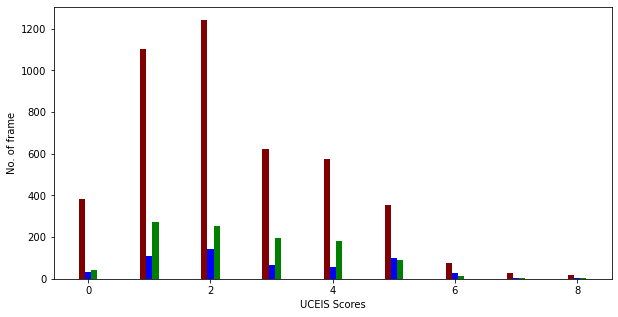

In [8]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar([0-0.1, 1-0.1, 2-0.1, 3-0.1, 4-0.1, 5-0.1, 6-0.1, 7-0.1,8-0.1],
        [u1.tolist().count(0),u1.tolist().count(1),u1.tolist().count(2),u1.tolist().count(3),u1.tolist().count(4),u1.tolist().count(5),u1.tolist().count(6),u1.tolist().count(7),u1.tolist().count(8)],
        color ='maroon',
        width = 0.1)
plt.bar([0, 1, 2, 3, 4, 5, 6, 7,8],
        [u2.tolist().count(0),u2.tolist().count(1),u2.tolist().count(2),u2.tolist().count(3),u2.tolist().count(4),u2.tolist().count(5),u2.tolist().count(6),u2.tolist().count(7),u3.tolist().count(8)],
        color ='blue',
        width = 0.1)
plt.bar([0+0.1, 1+0.1, 2+0.1, 3+0.1, 4+0.1, 5+0.1, 6+0.1, 7+0.1,8+0.1],
        [u3.tolist().count(0),u3.tolist().count(1),u3.tolist().count(2),u3.tolist().count(3),u3.tolist().count(4),u3.tolist().count(5),u3.tolist().count(6),u3.tolist().count(7),u3.tolist().count(8)],
        color ='green',
        width = 0.1)
 
plt.xlabel("UCEIS Scores")
plt.ylabel("No. of frame")
plt.title("")
plt.show()

In [9]:
best_total = 1000000
for i in range(20000):
    df = pd.read_csv(r'C:\Users\ElifKübraÇontar\Desktop\gi\label_x50.csv')
    df.head()
    train_folders, val_folders, test_folders = split()
    v1,b1,e1,v2,b2,e2,v3,b3,e3,u1,u2,u3 = df_train_val_test_split(train_folders, val_folders, test_folders)
    total = get_ratio_value(v1.to_numpy(),b1.to_numpy(),e1.to_numpy(),v2.to_numpy(),b2.to_numpy(),e2.to_numpy(),v3.to_numpy(),b3.to_numpy(),e3.to_numpy())
    if total ==-1:
        continue
    if total < best_total:
        best_total = total
        print('Best total is: ', best_total)
        print('Best split is saved at ..\splitted_folder_names\train-val-test_folders2.txt')
        with open(r'C:\Users\ElifKübraÇontar\Desktop\gi\Code\splitted_folder_names\train_folders50.txt', "w") as f:
            for item in train_folders:f.write("%s\n" % item)

        with open(r'C:\Users\ElifKübraÇontar\Desktop\gi\Code\splitted_folder_names\val_folders50.txt', "w") as f:
            for item in val_folders:f.write("%s\n" % item)

        with open(r'C:\Users\ElifKübraÇontar\Desktop\gi\Code\splitted_folder_names\test_folders50.txt', "w") as f:
            for item in test_folders:f.write("%s\n" % item)

Best total is:  94.41674074113776
Best split is saved at ..\splitted_folder_names	rain-val-test_folders2.txt
Best total is:  93.04329187135949
Best split is saved at ..\splitted_folder_names	rain-val-test_folders2.txt
Best total is:  81.43612034348781
Best split is saved at ..\splitted_folder_names	rain-val-test_folders2.txt
Best total is:  79.18305570017979
Best split is saved at ..\splitted_folder_names	rain-val-test_folders2.txt
Best total is:  78.39025642566718
Best split is saved at ..\splitted_folder_names	rain-val-test_folders2.txt
Best total is:  78.27065605758385
Best split is saved at ..\splitted_folder_names	rain-val-test_folders2.txt
Best total is:  78.09999351301376
Best split is saved at ..\splitted_folder_names	rain-val-test_folders2.txt
Best total is:  77.32429157043566
Best split is saved at ..\splitted_folder_names	rain-val-test_folders2.txt
Best total is:  75.80387843910131
Best split is saved at ..\splitted_folder_names	rain-val-test_folders2.txt
